In [2]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

visual_data = gpd.read_file("visual_data.gpkg")
fhcs = pd.read_csv(r"C:\Users\kalmanj\Documents\SCHOOL\695\Final\fqhcsphilly.csv")  # must have e.g. 'lon' & 'lat' columns
geometry = [Point(xy) for xy in zip(fhcs.lon, fhcs.lat)]
fhcs = gpd.GeoDataFrame(fhcs, geometry=geometry)
fhcs = fhcs.set_crs("EPSG:4269", inplace=False)

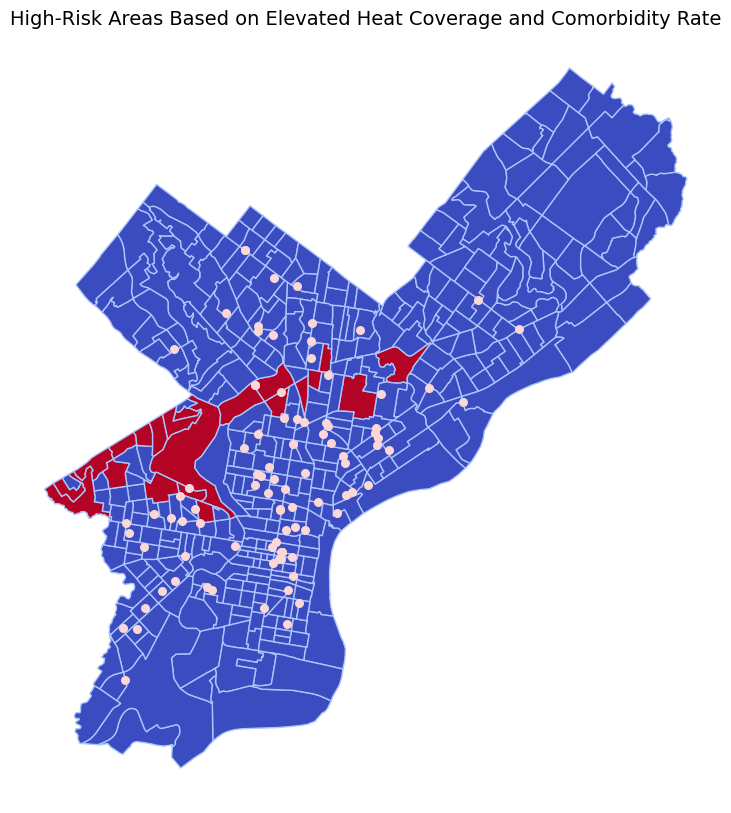

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
visual_data.plot(ax=ax, column='high_risk', cmap='coolwarm', legend=False, edgecolor='#ACC5FD')

# Optional: Add titles and labels
ax.set_title('High-Risk Areas Based on Elevated Heat Coverage and Comorbidity Rate', fontsize=14)
ax.axis('off')
fhcs.plot(
    ax=ax,
    marker='o',
    color='#FBD7D7',
    markersize=30,
    alpha=1,
    label='Health Locations'    # change label as appropriate
)
plt.show()

In [4]:

import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


view_1 = visual_data[visual_data['high_risk']]
view_2 = view_1[view_1['bufferzone'] == 'Outside']  # Outside buffer

views = [view_1, view_2]
titles = ['All High-Risk Areas', 'High-Risk Areas Outside of FQHC Buffer']

visual_data= visual_data.to_crs(epsg=4269)
views = [v.to_crs(epsg=4269) for v in views]

fig, ax = plt.subplots(figsize=(10, 10))
fill_colors = ['#FF8894', '#FF253A']  # Red then orange
def update(i):
    ax.clear()
    views[i].plot(ax=ax, color=fill_colors[i], edgecolor='black', alpha=0.9)
    visual_data.boundary.plot(ax=ax, color='gray', linewidth=0.5)  # context
    ax.set_title(titles[i], fontsize=16)
    ax.axis('off')

ani = FuncAnimation(fig, update, frames=2, interval=5000, repeat=True)

# Save as GIF (you need ImageMagick or Pillow)
ani.save("high_risk_animation.gif", writer="pillow", fps=.3)

plt.close()

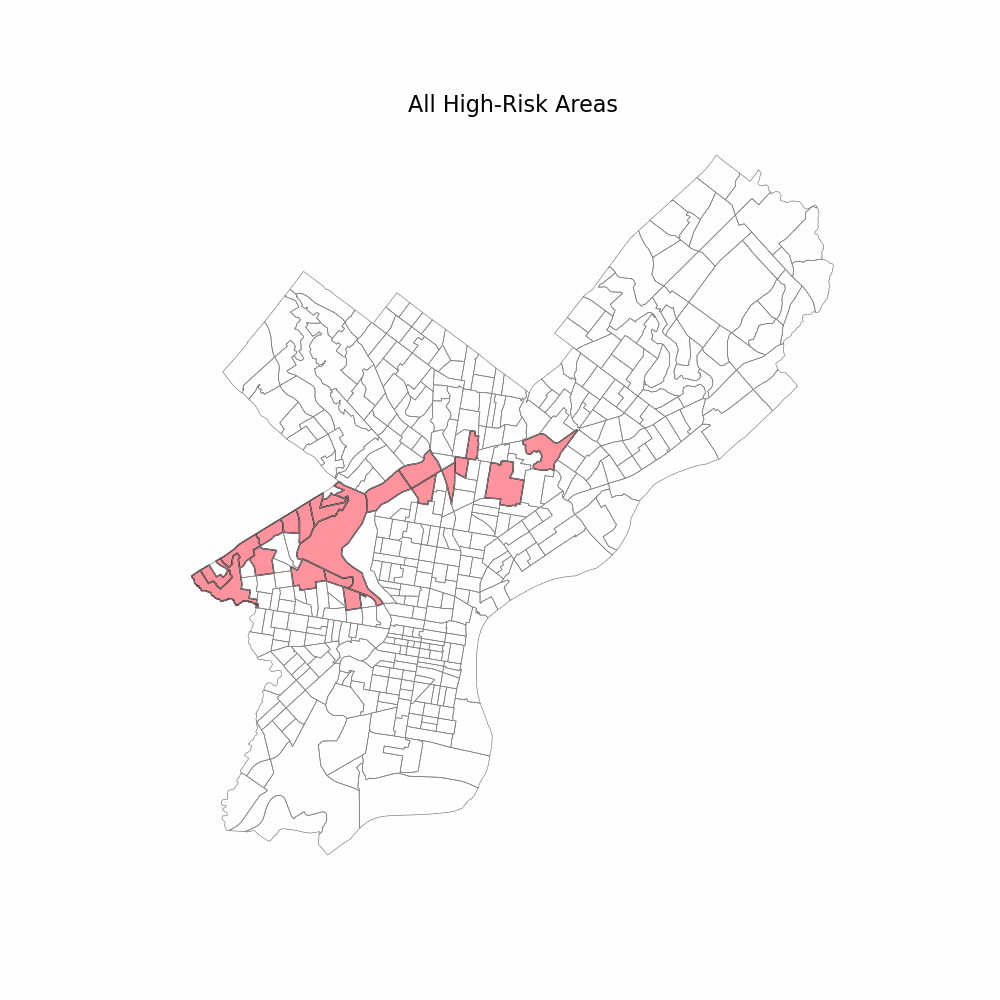

In [5]:
from IPython.display import Image
Image(filename="high_risk_animation.gif")


In [6]:
census = pd.read_csv(r"C:\Users\kalmanj\Documents\SCHOOL\695\Final\visualization\phillycensus.csv") 
census_merge = visual_data.merge(census, on='geocode', how='left')


In [7]:
filtered = census_merge[
    (census_merge['high_risk']) &
    (census_merge['bufferzone'] == 'Outside') 
]

final_filtered = filtered[
    (filtered['total_pop'] > 0) &
    (filtered['PCTpov'] > .20) &
    (filtered['PCTblack'] > .40)
]

# View or print results
print(f"{len(final_filtered)} geocodes outside of the FQHC bufferzone meet the criteria.")
print(final_filtered[['geocode', 'total_pop', 'PCTpov', 'PCTblack']])


3 geocodes outside of the FQHC bufferzone meet the criteria.
         geocode  total_pop    PCTpov  PCTblack
135  42101012201       2828  0.220297  0.559760
173  42101009802       5713  0.201120  0.907404
179  42101011400       6426  0.342515  0.936352


         geocode bufferzone  como.rate  veg_coverage veg_cat  heat_coverage  \
0    42101039100     Inside   0.000000      0.105444    High       0.334663   
1    42101980902     Inside   0.000000      0.073512  Medium       0.325128   
2    42101980904    Outside   0.000000      0.044030  Medium       0.350612   
3    42101980903     Inside   0.000000      0.053183  Medium       0.343371   
4    42101980906    Outside   0.000000      0.046935  Medium       0.339384   
..           ...        ...        ...           ...     ...            ...   
403  42101013602    Outside   0.143333      0.048246  Medium       0.324696   
404  42101034502    Outside   0.279412      0.059248  Medium       0.364994   
405  42101000902     Inside   0.225490      0.072492  Medium       0.303564   
406  42101001201     Inside   0.132701      0.066854  Medium       0.312582   
407  42101002702     Inside   0.198238      0.055700  Medium       0.323058   

     pred_como.rate  high_risk  \
0          0.1948

In [12]:

census_merge = gpd.GeoDataFrame(census_merge, geometry='geometry_x', crs="EPSG:4269")  # use correct CRS
census_merge.to_file("census_merge.gpkg", driver="GPKG")
